# **Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Loading our Dataset:**

In [ ]:
data = pd.read_csv("/content/creditcard.csv")
data.info()
data.head()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Data Cleaning**

In [ ]:

data_clean = data.dropna()
data_clean.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# **Data Normalization**

In [ ]:
Scaler = StandardScaler()
data_clean.iloc[:, :-1] = Scaler.fit_transform(data_clean.iloc[:, :-1])
data_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


# **Finding significant variables**

In [ ]:
data_clean = sm.add_constant(data_clean)
sig = sm.Logit(data_clean["Class"], data_clean.drop(["Class"], axis = 1))
sigmod = sig.fit()
sigmod.summary()

sigvars = sigmod.pvalues[sigmod.pvalues < 0.05].index






Optimization terminated successfully.
         Current function value: 0.003914
         Iterations 13


In [ ]:
data_sig = data_clean[sigvars]
data_sig["Class"] = data_clean["Class"]
print(data_sig.head())
print(data_sig.info())

   const        V1        V4        V8        V9       V10       V13  \
0    1.0 -0.694242  0.973366  0.082637  0.331128  0.083386 -0.996099   
1    1.0  0.608496  0.316523  0.071253 -0.232494 -0.153350  0.491418   
2    1.0 -0.693500  0.268231  0.207373 -1.378675  0.190700  0.720700   
3    1.0 -0.493325 -0.609727  0.316018 -1.262503 -0.050468  0.510169   
4    1.0 -0.591330  0.284655 -0.226510  0.744326  0.691625  1.352244   

        V14       V20       V21       V22       V27       V28    Amount  Class  
0 -0.324610  0.326118 -0.024923  0.382854  0.330892 -0.063781  0.244964      0  
1 -0.149982 -0.089611 -0.307377 -0.880077 -0.022256  0.044608 -0.342475      0  
2 -0.173114  0.680975  0.337632  1.063358 -0.137137 -0.181021  1.160686      0  
3 -0.300360 -0.269855 -0.147443  0.007267  0.155396  0.186189  0.140534      0  
4 -1.168034  0.529939 -0.012839  1.100011  0.543620  0.651816 -0.073403      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Dat

<ipython-input-67-453d31472e12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sig["Class"] = data_clean["Class"]


# **Splitting the data**

In [ ]:
x = data_sig.drop(["Class"], axis = 1)
y = data_sig["Class"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)


,const,V1,V4,V8,V9,V10,V13,V14,V20,V21,V22,V27,V28,Amount
223361,1.0,0.998136,0.233183,0.030137,0.959887,-0.027957,1.261755,-0.264206,-0.162649,0.324289,1.334304,0.111905,-0.142827,-0.313289
165061,1.0,-0.204716,-1.425115,-0.336266,0.036753,0.561249,1.065927,-1.244893,-0.610140,-0.208959,0.581097,-0.917839,-0.438653,-0.169717
238186,1.0,0.037019,-0.501387,0.098192,-0.119490,-0.586144,-1.013026,-0.667904,0.015860,-0.428357,-1.202920,0.511344,0.212940,-0.305292
150562,1.0,-0.273165,1.955969,-0.068090,0.338220,0.514852,0.288235,1.326166,-0.329160,0.086485,0.611038,-0.230441,-0.196713,0.116306
138452,1.0,-2.055932,-0.020886,1.099978,0.487920,1.122054,0.781296,0.195792,-0.015981,-0.654427,-0.317444,0.710805,-0.977550,-0.250239


# **Plot Correlations**

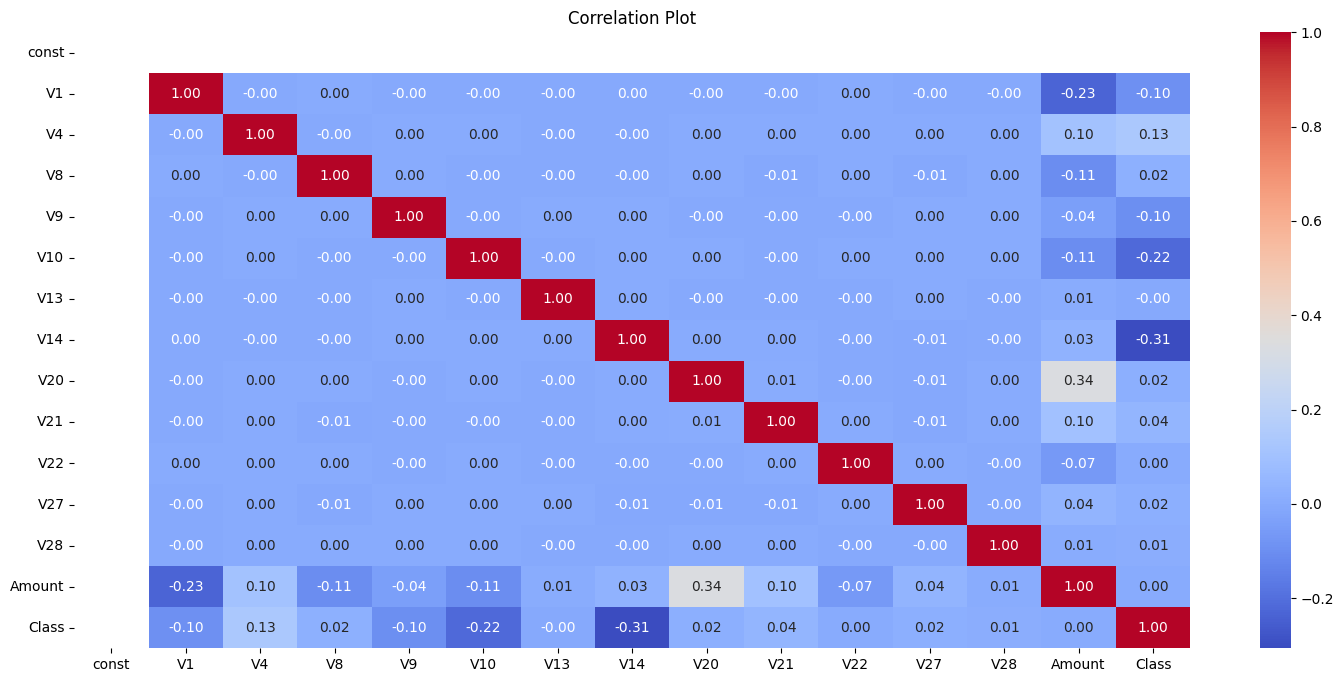

In [ ]:
sig_data = pd.concat([x_train, y_train], axis = 1)

plt.figure(figsize = (18,8))
sns.heatmap(sig_data.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Plot")
plt.show()

# **Visualizing significant variables**

In [ ]:
for col in sigvars:
  sns.scatterplot(x = x_train[col], y = y_train)
  plt.figure(figsize = (6,4))
  plt.title = ("f {col} vs Class")
  plt.show()

NameError: name 'sigvars' is not defined

# **Logistic Regression**

In [ ]:
logmod = LogisticRegression()
logmod.fit(x_train,y_train)

logpred = logmod.predict(x_test)

print(accuracy_score(y_test, logpred))
print(classification_report(y_test, logpred))
cm = print(confusion_matrix(y_test, logpred))



0.9989993328885924
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.54      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962

[[56852    12]
 [   45    53]]


# **Random Forest**

In [ ]:
ranmod = RandomForestClassifier()
ranmod.fit(x_train, y_train)
ranpred = ranmod.predict(x_test)

print(accuracy_score(y_test, ranpred))


0.9995786664794073


# **SVM**

In [ ]:
svmmod = SVC(kernel = "rbf", random_state = 42)
svmmod.fit(x_train,y_train)

svmpred =svmmod.predict(x_test)

print(accuracy_score(y_test, svmpred))

0.9993679997191109


# **Model Evaluation**

In [ ]:
print("Logistic:", confusion_matrix(y_test,logpred))
print("\n Random Forest:", confusion_matrix(y_test, ranpred))
print("\n SVM:", confusion_matrix(y_test, svmpred))

#We've to use the model with least "False negative rate", which is from our confusion metrices, random forest.

Logistic: [[56852    12]
 [   45    53]]

 Random Forest: [[56863     1]
 [   23    75]]

 SVM: [[56861     3]
 [   33    65]]
